<a href="https://colab.research.google.com/github/jayllfpt/FPTU-MAI391-ImageCompressionUsingSVD/blob/main/SVD_Image_Compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


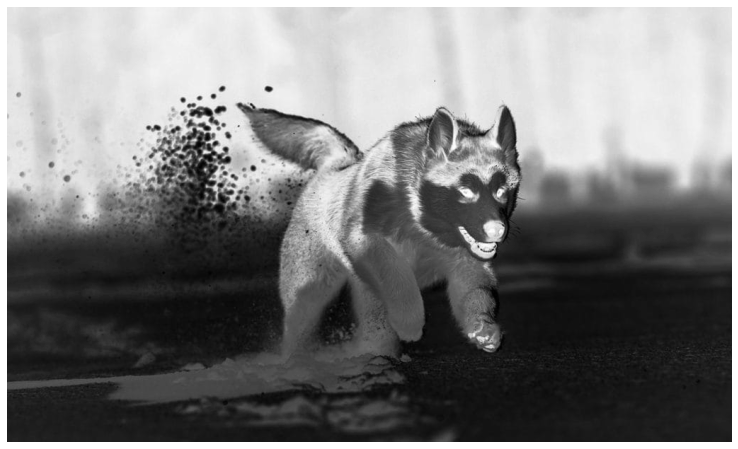

In [ ]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os

plt.rcParams['figure.figsize'] = [16, 8]

img_path = '/content/drive/My Drive/Colab Notebooks/husky.jpg'
A = imread(img_path)
X = np.mean(A, -1) #convert RGB -> Grayscale

img = plt.imshow(256 - X)
plt.axis('off')
img.set_cmap('gray')
plt.show()

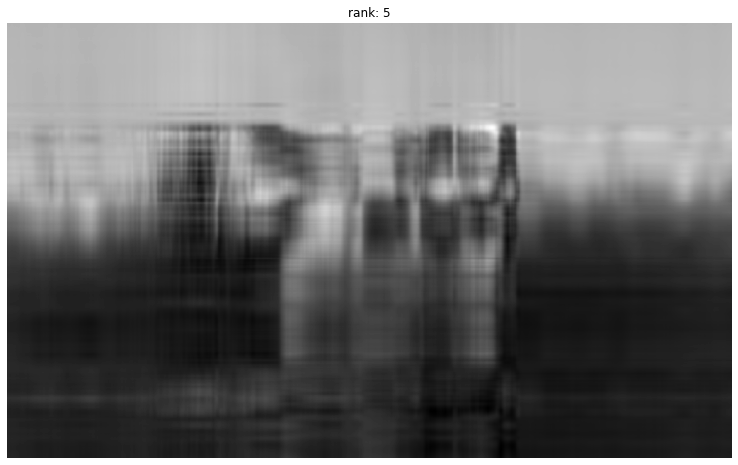

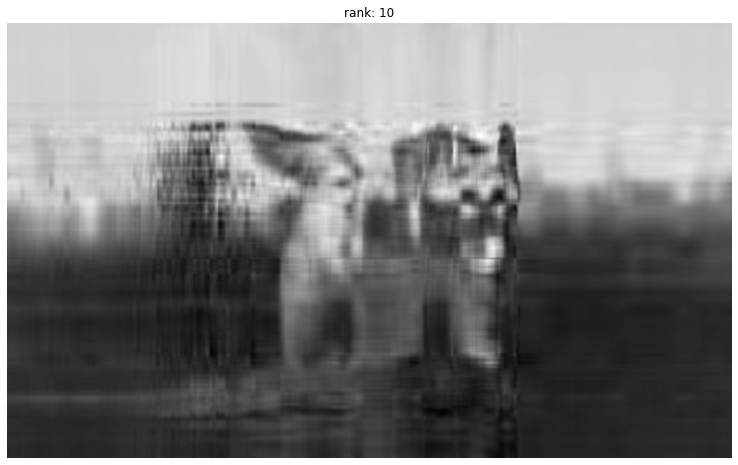

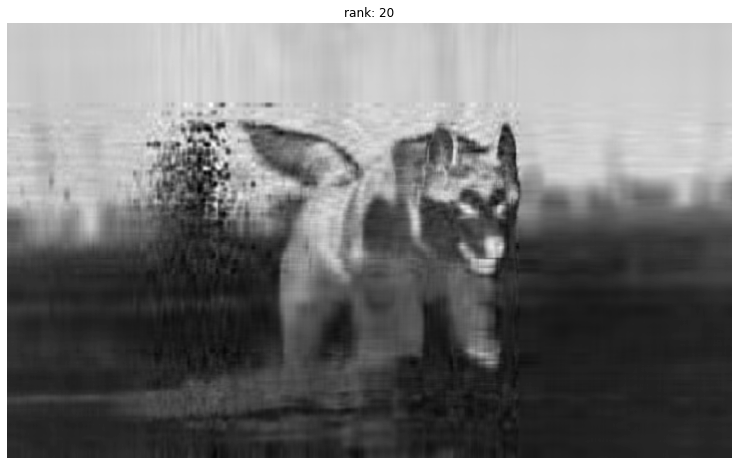

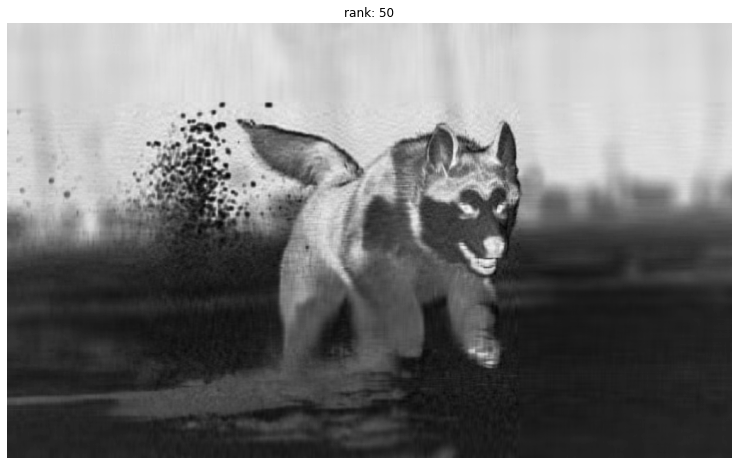

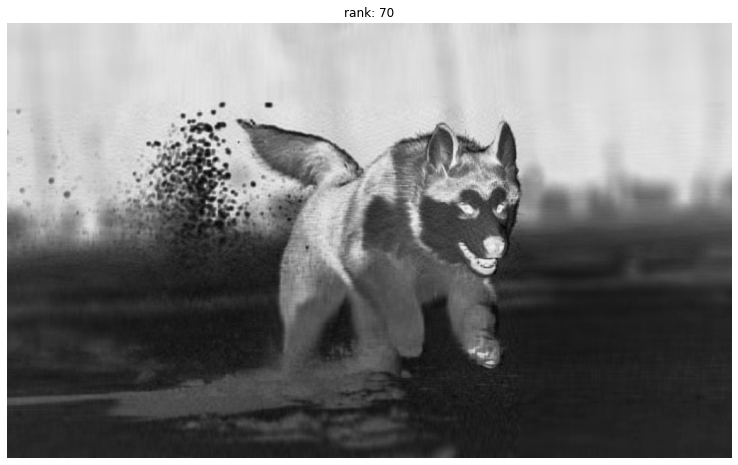

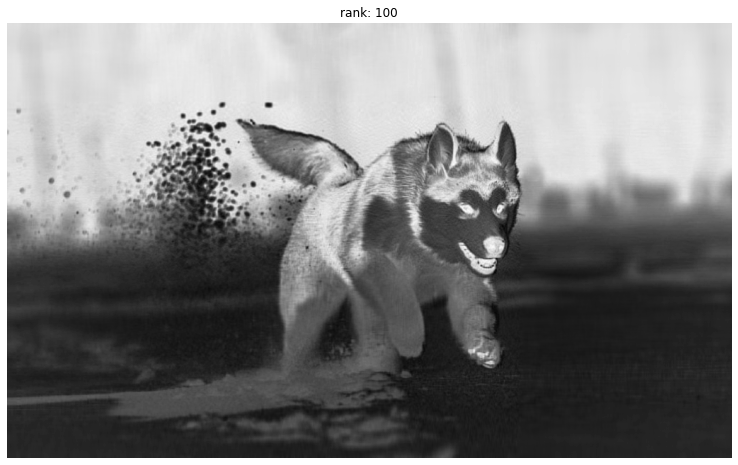

In [23]:
U, S, VT = np.linalg.svd(X, full_matrices=False)
S = np.diag(S)

rank_result = [5, 10, 20, 50, 70, 100]
i = 0
for rank in rank_result:
  # construct image
  Xa = U[:, :rank] @ S[0:rank, :rank] @ VT[:rank, :]
  plt.figure(i+1)
  i+= 1
  img = plt.imshow(256 - Xa)
  img.set_cmap('gray')
  plt.axis('off')
  plt.title('rank: '+ str(rank))
  plt.show()

In [ ]:
plt.figure(1)
plt.title('Singular Values')
plt.semilogy(np.diag(S))
plt.show()

plt.figure(2)
plt.title('Singular Values: Cumulative Sum')
plt.plot(np.cumsum(np.diag(S)) / np.sum(np.diag(S)) )
plt.show()